In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

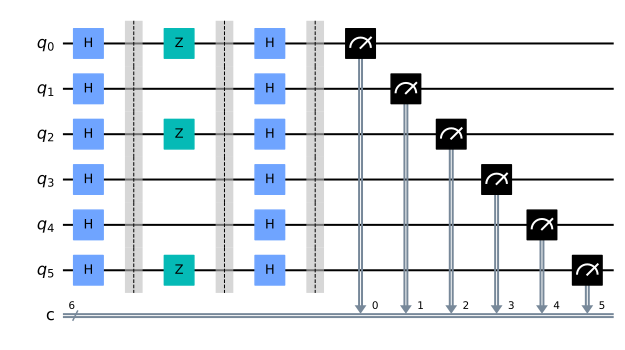

In [2]:
""" Bernstein-Vaziraniアルゴリズム
fa: {0,1}^n -> {0,1}
fa(x) = ax (mod 2)

ここでa, x はnビットのビット列で、fa(x)は外から見るとブラックボックスだが、定数aが定められていて任意の入力xに対して値を返す

fa(x)のビット列aを求めたい。
"""
# 求めたいビット列
a = "100101"
n = len(a)

# オラクルを用意
def oracle(qc, a):
    for i, s in enumerate(reversed(a)):
        if s == "1":
            qc.z(i)

# 回路作成
qc = QuantumCircuit(n, n)

# 全量子ビットにHゲート
for i in range(n):
    qc.h(i)
qc.barrier()

# オラクルを適用
oracle(qc, a)
qc.barrier()

# 全量子ビットにHゲート
for i in range(n):
    qc.h(i)
qc.barrier()

# 測定
for i in range(n):
    qc.measure(i, i)

qc.draw()

{'100101': 1024}


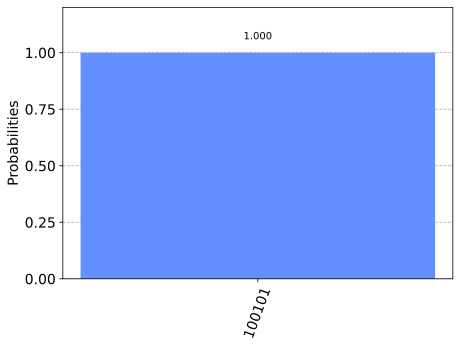

In [4]:
"""実行
"""
backend = Aer.get_backend("aer_simulator")
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)